# How to Normalize Data in Python

## Learning Objectives
Part of the objective of data preparation, is to transform our data in order to make it more suitable for machine learning. During this step, we often have to restructure some of our data so that it conforms to a particular characteristic. This is known as **normalization** or **standardization**. There are several ways to normalize data in Python. By the end of the tutorial, you will have learned:

+ how to perform min-max normalization
+ how to perform z-score normalization

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
vehicles = pd.read_csv('./data/vehicles.csv')
vehicles.head()

,citympg,cylinders,displacement,drive,highwaympg,make,model,class,year,transmissiontype,transmissionspeeds,co2emissions
0,14.0,6,4.1,2-Wheel Drive,19.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
1,14.0,8,5.0,2-Wheel Drive,20.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,555.437500
2,18.0,8,5.7,2-Wheel Drive,26.0,Buick,Electra/Park Avenue,Large Cars,1984,Automatic,4,484.761905
3,21.0,6,4.3,Rear-Wheel Drive,31.0,Cadillac,Fleetwood/DeVille (FWD),Large Cars,1984,Automatic,4,424.166667
4,14.0,8,4.1,Rear-Wheel Drive,19.0,Cadillac,Brougham/DeVille (RWD),Large Cars,1984,Automatic,4,555.437500


In [4]:
vehicles.describe().T

,count,mean,std,min,25%,50%,75%,max
citympg,36973.0,17.532497,4.473165,6.0,15.0,17.000000,20.0000,57.000000
cylinders,36979.0,5.775765,1.756336,2.0,4.0,6.000000,6.0000,16.000000
displacement,36970.0,3.345899,1.359921,0.6,2.2,3.000000,4.3000,8.400000
highwaympg,36971.0,23.769360,5.719440,9.0,20.0,24.000000,27.0000,61.000000
year,36979.0,2000.889045,10.400847,1984.0,1991.0,2001.000000,2010.0000,2018.000000
transmissionspeeds,36979.0,4.954271,1.228390,1.0,4.0,5.000000,6.0000,10.000000
co2emissions,36979.0,476.550703,117.791357,29.0,400.0,467.736842,555.4375,1269.571429


In [5]:
vehicles['co2emissions'].describe()

count    36979.000000
mean       476.550703
std        117.791357
min         29.000000
25%        400.000000
50%        467.736842
75%        555.437500
max       1269.571429
Name: co2emissions, dtype: float64

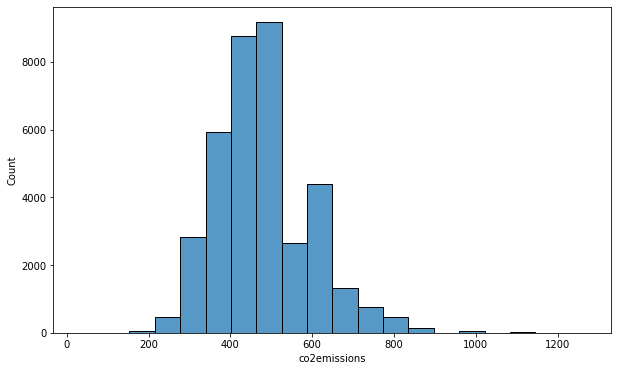

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(x='co2emissions', data=vehicles, bins=20);

## How to perform min-max Normalization - using sklearn MinMaxScaler

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [20]:
co2_emissions_mm = scaler.fit_transform(vehicles[['co2emissions']])
co2_emissions_mm

array([[0.42435082],
       [0.42435082],
       [0.36738062],
       ...,
       [0.38208199],
       [0.50944265],
       [0.41674344]])

In [22]:
co2_emissions_mm = pd.DataFrame(co2_emissions_mm, columns=['co2emissions'])
co2_emissions_mm

,co2emissions
0,0.424351
1,0.424351
2,0.367381
3,0.318536
4,0.424351
...,...
36974,0.332911
36975,0.352257
36976,0.382082
36977,0.509443


In [23]:
# now we have min-max scaled data, we want to check the statistics
co2_emissions_mm.describe()

,co2emissions
count,36979.000000
mean,0.360762
std,0.094949
min,0.000000
25%,0.299056
50%,0.353657
75%,0.424351
max,1.000000


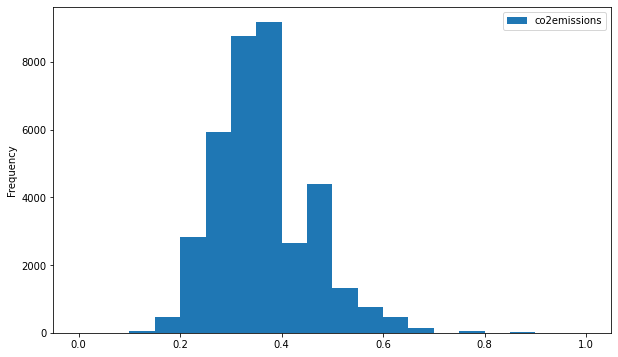

In [28]:
# we can also plot it
# NOTE THAT the basic shape of data is still the same although value on x are scaled
co2_emissions_mm.plot(kind='hist', 
                      bins=20, 
                      figsize=(10, 6));

## How to perform z-score Normalization - using skelarn StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
co2emissions_zm = scaler.fit_transform(vehicles[['co2emissions']])
co2emissions_zm = pd.DataFrame(co2emissions_zm, columns=['co2emissions'])
co2emissions_zm.describe()

,co2emissions
count,3.697900e+04
mean,-1.844617e-16
std,1.000014e+00
min,-3.799572e+00
25%,-6.498927e-01
50%,-7.482706e-02
75%,6.697254e-01
max,6.732510e+00


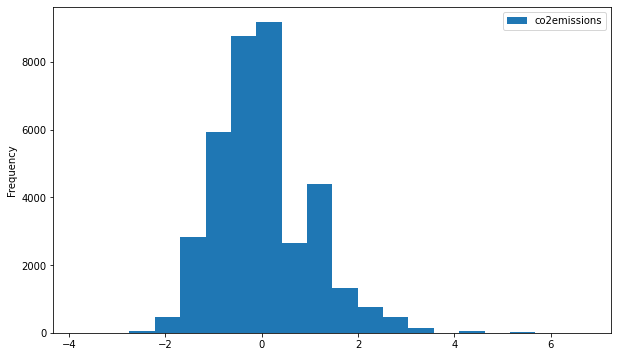

In [32]:
co2emissions_zm.plot(kind='hist',
                    bins=20,
                    figsize=(10, 6));